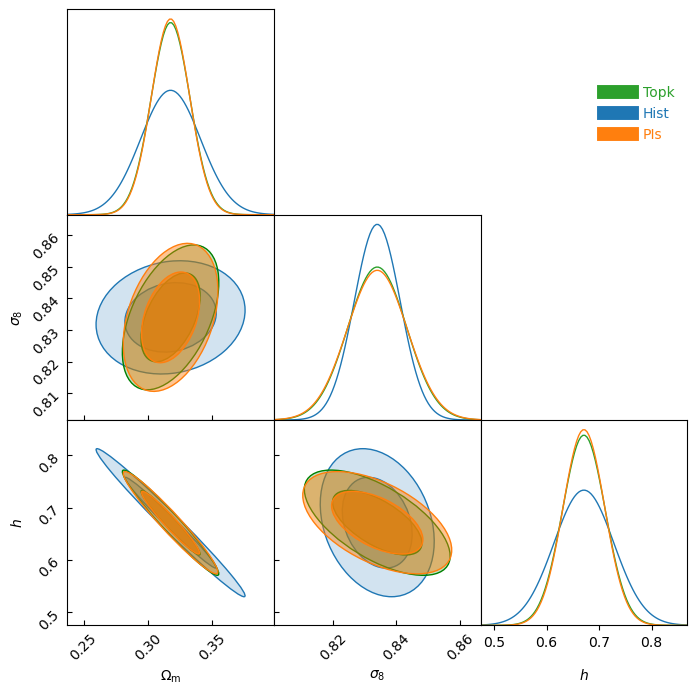

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def gaussian(x, mu, sig):
    # return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / sig / np.sqrt(2 * np.pi)


def draw_marginalized_contours(fisher_matrices, parameter_names, means, covlabel):
    
    colorr = ["tab:blue", "green", "tab:orange"]
    
    gaussian_colorr = ["tab:blue", "tab:green", "tab:orange"]
    ellipse_alphaa = [[0, 0.3, 0.2],[0, 0.5, 0.25], [0, 0.65, 0.45]]
    fig, axs = plt.subplots(len(parameter_names), len(parameter_names), figsize=(8, 8))
    confidence_factor = np.sqrt(2.279)
    invFM = np.array([np.linalg.inv(fisher_matrix) for fisher_matrix in fisher_matrices])
    sigma_axis = 3
    alpha = [0, 1.52, 2.48, 3.44]
    for i in range(len(parameter_names)):
        for j in range(len(parameter_names)):
            
            if i < j :
                fig.delaxes(axs[i, j])    
                continue    
            
            widthi = alpha[sigma_axis] * np.sqrt(np.max(invFM[:, i, i]))
            widthj = alpha[sigma_axis] * np.sqrt(np.max(invFM[:, j, j]))
            
            yblim = means[i] - widthi
            ytlim = means[i] + widthi
            
            xllim = means[j] - widthj
            xrlim = means[j] + widthj
            if i == j:
                
                axs[i, j].set_xlim(left=xllim, right=xrlim)
                xx = np.linspace(xllim, xrlim, 100)
                for idx, cov in enumerate(invFM):
                    axs[i, j].plot(xx, gaussian(xx, means[i], np.sqrt(cov[i, j])), lw=1, \
                                   color=gaussian_colorr[idx], label=covlabel[idx])
                axs[i, j].set_ylim(bottom=0)
                axs[i, j].tick_params(left=False)
                axs[i, j].set_yticklabels([])
                                   
                    
            if i > j :
                for idx in range(len(fisher_matrices)):
                    axs[i, j].tick_params(direction="in", labelsize=10, labelrotation=45)
                    cov = np.array([[invFM[idx][i, i], invFM[idx][i, j]], [invFM[idx][j, i], invFM[idx][j, j]]])
                    a2 = (invFM[idx][j,j] + invFM[idx][i,i]) / 2 + np.sqrt((invFM[idx][j,j] - invFM[idx][i,i])**2 / 4 + invFM[idx][j, i]**2)
                    b2 = (invFM[idx][j,j] + invFM[idx][i,i]) / 2 - np.sqrt((invFM[idx][j,j] - invFM[idx][i,i])**2 / 4 + invFM[idx][j, i]**2)
                    tan2th = 2 * invFM[idx][j, i] / (invFM[idx][j,j] - invFM[idx][i,i])
                    
                    a = np.sqrt(a2)
                    b = np.sqrt(b2)
                    th = np.degrees(np.arctan(tan2th) / 2)
                    th = np.degrees(np.arctan2(2 * invFM[idx][j, i], invFM[idx][j,j] - invFM[idx][i,i]) / 2)

 

                    center = (means[j], means[i])
                    for sigma_plot in [2, 1]:
                        hid = j; vid = i;
                        ellipse1 = Ellipse(xy=(means[hid], means[vid]), width=alpha[sigma_plot]*a*2, \
                                           height=alpha[sigma_plot]*b*2, angle=th, lw=0, \
                                           alpha=ellipse_alphaa[idx][sigma_plot], \
                                           color=colorr[idx])
                    
                        ellipse2 = Ellipse(xy=(means[hid], means[vid]), width=alpha[sigma_plot]*a*2, \
                                           height=alpha[sigma_plot]*b*2, angle=th, lw=1, \
                                           alpha=1, color=colorr[idx], fill=False)
                        
                        axs[i, j].add_patch(ellipse1)
                        axs[i, j].add_patch(ellipse2)
                    """
                    ellipse = Ellipse(xy=center, width=semi_major, height=semi_minor, angle=angle, \
                                      edgecolor='b', lw=2, facecolor='none')
                    axs[i, j].add_patch(ellipse)
                    """

                axs[i, j].set_xlabel(parameter_names[j])
                if j == 0 : axs[i, j].set_ylabel(parameter_names[i])

                axs[i, j].set_xlim(left=xllim, right=xrlim)
                axs[i, j].set_ylim(top=ytlim, bottom=yblim)
                
                if j != 0 and i != 0:
                    axs[i, j].set_yticklabels([])

    axs[-1, -1].set_xlabel(parameter_names[-1])
    lines = []
    labels = []
    axLine, axLabel = axs[0, 0].get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    lines[0], lines[1] = lines[1], lines[0]
    labels[0], labels[1] = labels[1], labels[0]
    leg = fig.legend(lines, labels, bbox_to_anchor=(0.9,0.8), frameon=False, labelcolor='linecolor')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(10.0)

    fig.align_ylabels(axs[:, 0])
    fig.align_xlabels(axs[-1, :])

    # fig.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig("fisher_contours.png")
    plt.show()

# Example usage with a 3x3 Fisher matrix
# fisher_matrix = [np.array([[1, 0.5, 0.2], [0.5, 2, 0.3], [0.2, 0.3, 0.8]]), 0.5 * np.array([[1, 0.5, 0.2], [0.5, 2, 0.3], [0.2, 0.3, 0.8]])]
fm_hist = np.array([[159480.09,  67777.55,  66330.12], [67777.55,  49216.03,  28840.58], [66330.12,
  28840.58,  27914.63]])
fm_topk = np.array([[140923.83,  50752.47,  58075.57],  [50752.47,  37774.24,  23727.52],  [58075.57,\
  23727.52,  24944.8 ]])
fm_pi =  np.array([[120770.8671875, 42028.2109375, 49017.671875], [42028.21875, 30274.55078125, 19060.2890625], \
                   [49017.6796875, 19060.2890625, 20792.900390625]])
fisher_matrices = [fm_hist, fm_topk, fm_pi]
covlabel = ["Hist", "Topk", "PIs"]
parameter_names = [r"$\Omega_{\rm{m}}$", r"$\sigma_8$", r"$h$"]

means = [0.3175, 0.834, 0.6711]

draw_marginalized_contours(fisher_matrices, parameter_names, means, covlabel)


In [93]:
my_2d_array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print(my_2d_array.tolist())

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [ ]:
import sys, os, pickle
import glob
import numpy as np
import tqdm
from tqdm import tqdm
import tensorflow as tf
import topofisher
from topofisher.fisher.imnn import IMNNLayer, ExtraDimLayer
from topofisher.pipelines.utils import writeToFile
import matplotlib.pyplot as plt
from topofisher.fisher.plot_fisher_stats import plotContours2D, plotSummaryDerivativeHists, plot_derivative_convergence



In [83]:
inputFileName = "/Users/karthikviswanathan/Downloads/cluster/pis_15/"
# outputFolderName = sys.argv[2]
numIterations = 1

pickle_files = glob.glob(os.path.join(inputFileName, '*/*.pkl'))
all_vecs = {}
der_params = ["Om", "s8", "h"]

param_list = ["fiducial"]
delta_theta = []
if "Om" in der_params:
   param_list.extend(["Om_m", "Om_p"]) 
   delta_theta.append(0.02)

if "s8" in der_params:
    param_list.extend(["s8_m", "s8_p"])
    delta_theta.append(0.03)

if "h" in der_params:
    param_list.extend(["h_m", "h_p"])
    delta_theta.append(0.04)

delta_theta = np.array(delta_theta)
    
for item in param_list : all_vecs[item] = []
print(param_list)
for file_path in pickle_files:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        param = file_path.split("/")[-2][12:]
        if param in param_list:
            all_vecs[param].append(data)

all_arr = [np.concatenate(all_vecs[item], axis = 0) for item in tqdm(param_list)]
all_arr = [np.transpose(item, (0, 2, 3, 1)) for item in all_arr]
# all_arr[0] = all_arr[0][:7500]
# all_arr = tf.stack(all_arr, axis = 1)

['fiducial', 'Om_m', 'Om_p', 's8_m', 's8_p', 'h_m', 'h_p']


100%|██████████| 7/7 [00:01<00:00,  3.71it/s]


In [84]:
all_arr[0].shape

(10000, 32, 32, 3)